# ***NETFLIX CASE STUDY***


COLAB LINK:


https://colab.research.google.com/drive/1m3OAN92VjjuHDnjvKKvf-hHM2WK_CJdy?usp=sharing

# **DEFINING PROBLEM STATEMENT AND BASIC MATRIX**

As we know that NETFLIX is a subscription based streaming platform that allows there users to watch MOVIES and TV SHOWS without any interruption.

The main objective of the NETFLIX project is to provide the insight from this dataset which will help the company to grow further more in the industry and also provide information about where they are lagging from their competitor and help them by providing the solution for it.

**Column Profiling:**
* Show_id: Unique ID for every Movie / Tv Show
* Type: Identifier - A Movie or TV Show
* Title: Title of the Movie / Tv Show
* Director: Director of the Movie
* Cast: Actors involved in the movie/show
* Country: Country where the movie/show was produced
* Date_added: Date it was added on Netflix
* Release_year: Actual Release year of the movie/show
* Rating: TV Rating of the movie/show
* Duration: Total Duration - in minutes or number of seasons
* Listed_in: Genre
* Description: The summary description

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import all the library which will be use full to analyse this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# Load the netflix dataset
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

**BASIC ANALYSIS ON THE DATASET**

In [4]:
#Total number of elemnts this dataframe contains
df.size

105684

In [5]:
# It shows the count of the no.of row and columns present in dataframe
df.shape

(8807, 12)

In [6]:
# Dimension pf the datsframe
df.ndim

2

In [7]:
# Top 5 rows of the dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Last 5 rows of the dataframe
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [9]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
# All the columns present in the dataframe
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Its gave the information about the basic statistics of variables or the descriptive statistics of the data(also known to be 5 number summary)
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [13]:
# It shows how much space used by each of the columns
df.memory_usage(deep= True)

Index               128
show_id          544927
type             551386
title            671398
director         547911
cast            1705661
country          581565
date_added       631404
release_year      70456
rating           540938
duration         563918
listed_in        796204
description     2146200
dtype: int64

#MISSING VALUE(HANDLING)
*(DATA PREPROCESSING) OR (DATA CLEANING)*

In [14]:
#total number of missing value availabe in the dataframe
df.isna().sum().sum()

4307

In [15]:
#check for missing values in every columns
(df.isna().sum()*100/len(df)).sort_values(ascending = False)

director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

CONCLUSION:

so we can clearly see that only 6 columns contains null values

In [16]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
df['rating'] = df['rating'].replace({'66 min':np.nan, '74 min':np.nan, '84 min': np.nan})
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
# Handling the missing values and storing it on new dataframe
new_df = df.fillna({'director':'Unknown',
           'cast':'Unknown',
          'country':df['country'].mode()[0],
          'rating': df['rating'].fillna('Unavailable'),
          'duration' : df['duration'].mode()[0]})

In [19]:
# No missing values for the columns
new_df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [20]:
# Delete the unnecessary columns from the dataframe
new_df = new_df.drop(columns = 'description')

In [21]:
# create seperate dataframe for movies and tv shows
movies_df = new_df[new_df['type'] == 'Movie']
tvshow_df = new_df[new_df['type'] == 'TV Show']

In [22]:
# convert date_added to the datetime function
#new_df['date_added'] = pd.to_datetime(new_df['date_added'])
new_df['date_added'] = pd.to_datetime(new_df['date_added'].str.strip(), format='%B %d, %Y')


In [23]:
new_df['year'] = new_df['date_added'].dt.year
new_df['month'] = new_df['date_added'].dt.month
new_df['week'] = new_df['date_added'].dt.dayofweek

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  year          8797 non-null   float64       
 12  month         8797 non-null   float64       
 13  week          8797 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 963.4+ KB


# Value counts and unique attributes


In [25]:
# check for the duplicated values present in the dataframe
new_df.duplicated().sum()

0

conclusion:
There are no duplicate items in the dataframe


In [26]:
# Show us the value count of all movies and tv_shows.
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [27]:
# It show us the value count of all casts present in the dataframe
new_df[new_df['cast'] != 'Unknown']['cast'].str.split(',').explode().str.strip().value_counts().head()

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Name: count, dtype: int64

In [28]:
# It show us the value count of all director present in the dataframe
new_df[new_df['director'] != 'Unknown']['director'].str.split(',').explode().str.strip().value_counts().head()

director
Rajiv Chilaka    22
Jan Suter        21
Raúl Campos      19
Suhas Kadav      16
Marcus Raboy     16
Name: count, dtype: int64

In [29]:
# It show us the value count of all country present in the dataframe
new_df['country'].str.split(',').explode().str.strip().value_counts().head()

country
United States     4521
India             1046
United Kingdom     806
Canada             445
France             393
Name: count, dtype: int64

In [30]:
# Sum of all the unique elements in the dataframe
new_df.nunique().sum()

33156

In [31]:
# All the unique elements in each columns present in the dataframe
new_df.nunique()

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          748
date_added      1714
release_year      74
rating            15
duration         220
listed_in        514
year              14
month             12
week               7
dtype: int64

## NON GRAPHICAL AND GRAPHICAL ANALYSIS

**IMPORTANT QUESTIONS WE NEED TO ANSWERS**

In [32]:
# conversion of type and rating into categorical
new_df[['rating','type']] = new_df[['rating','type']].astype('category')

Comparison of tv shows vs movies

In [33]:
# Find the counts of each categorical variable using nongraphical analysis
new_df.groupby('type')['type'].count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

**UNIVARIATE ANALYSIS**

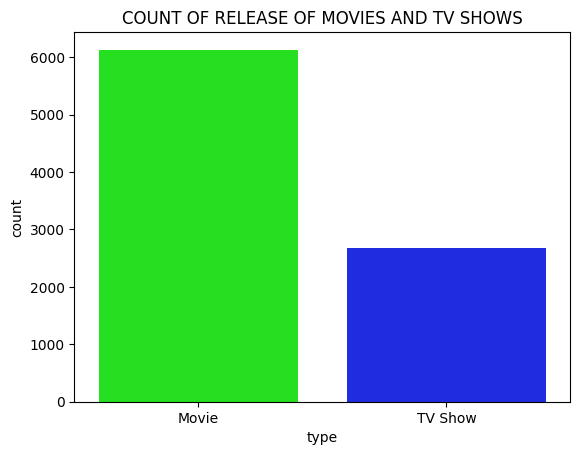

In [75]:
#countplot
sns.countplot(data = new_df, x='type', palette='hsv')
plt.title('COUNT OF RELEASE OF MOVIES AND TV SHOWS')
plt.show()


CONCLUSION:

From the above graph we can observe that MOVIES in NETFLIX platform present are more in number that is around 6131 in comparison with the TV SHOWS which contains the number of 2676.


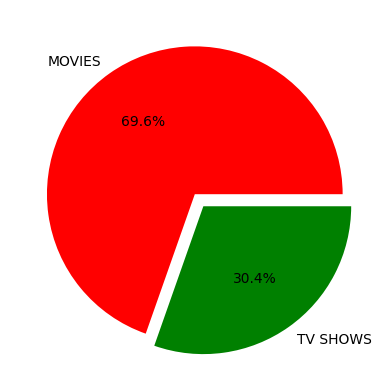

In [35]:
# Pieplot for getting the running total
plt.pie(new_df['type'].value_counts(),colors=['red','green'],autopct='%1.1f%%',explode=[0, 0.1],labels=['MOVIES','TV SHOWS'])
plt.show()

In [36]:
# value counts for all the ratings
Ratings = new_df['rating'].value_counts()
Ratings = Ratings.to_frame().reset_index()
Ratings_df = Ratings.rename(columns = {'index':'Ratings','rating':'Counts'})
Ratings_df

,Counts,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


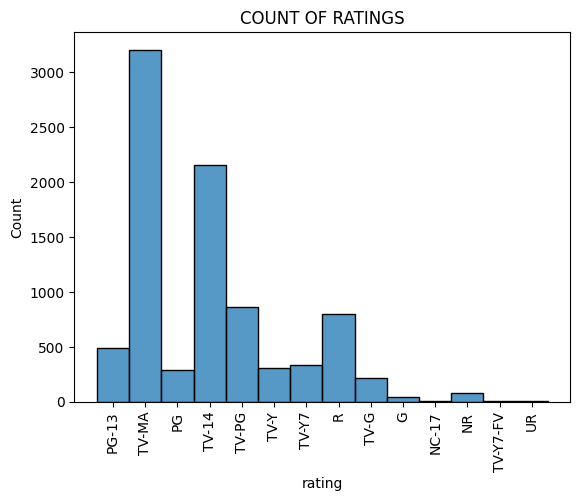

In [76]:
# HISTPLOT
sns.histplot(data = df, x ='rating')
plt.xticks(rotation = 90)
plt.title('COUNT OF RATINGS')
plt.show()

CONCLUSION:

From this graph we can conclude that in NETFLIX content having rating of TV-MA(the content you're about to watch isn't suitable for audiences under 17)
has the highest count in comparison to others

<Figure size 1300x600 with 0 Axes>

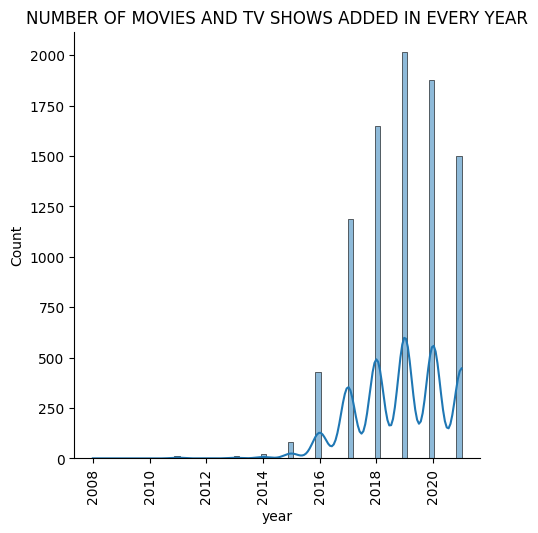

In [38]:
# Distplot
# plot graph for content added in the netflix over the years
plt.figure(figsize=(13,6))
sns.displot(data = new_df, x ='year',kde =True)
plt.xticks(rotation = 90)
plt.title('NUMBER OF MOVIES AND TV SHOWS ADDED IN EVERY YEAR')
plt.show()

CONCLUSION:

From this graph we can observe that in 2018 and 2019 NETFLIX added way more content in platform in comparison with other years

ANALYSIS ON THE COUNTRIES

BIVARIATE ANALYSIS

In [39]:
# TOP 10 country producing highest number of movies
top10_movie = movies_df.groupby('country').size().sort_values(ascending =False)[:10].to_frame()
top10_movie = top10_movie.rename(columns = {0:'count'}).reset_index()
top10_movie

,country,count
0,United States,2498
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Turkey,76
9,Japan,76


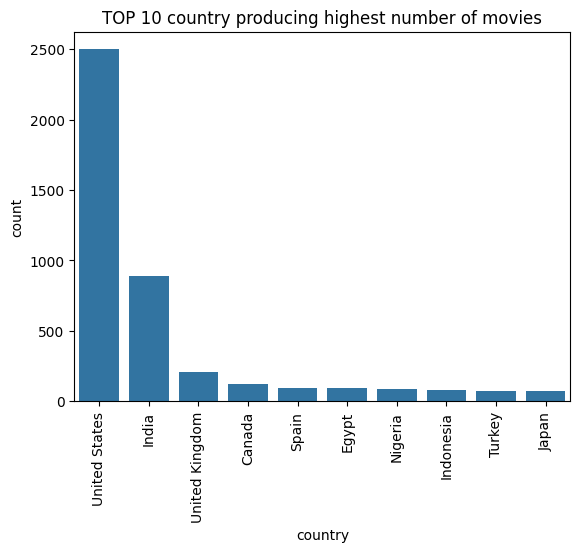

In [40]:
# Barplot
sns.barplot(top10_movie,x='country',y='count')
plt.xticks(rotation = 90)
plt.title('TOP 10 country producing highest number of movies')
plt.show()

In [41]:
# TOP 10 country producing highest number of tvshows
top10_tv = tvshow_df.groupby('country').size().sort_values(ascending =False)[:10].to_frame()
top10_tv = top10_tv.rename(columns = {0:'count'}).reset_index()
top10_tv

,country,count
0,United States,1151
1,United Kingdom,213
2,Japan,169
3,South Korea,158
4,India,79
5,Taiwan,68
6,Canada,59
7,France,49
8,Australia,48
9,Spain,48


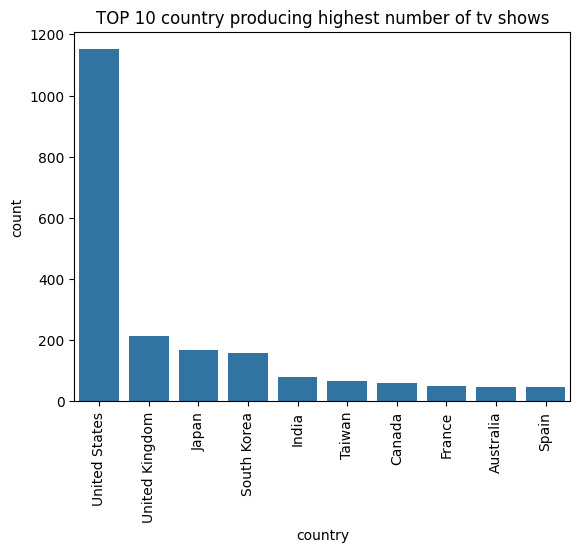

In [42]:
sns.barplot(top10_tv,x='country',y='count')
plt.xticks(rotation = 90)
plt.title('TOP 10 country producing highest number of tv shows')
plt.show()

CONCLUSION:
*  UNITED STATES produces high number of movies and tv shows.
*  INDIA is the second country who produces highest number of movies.
*  UNITED KINGDOM is the second country which prodces highest number of tv shows


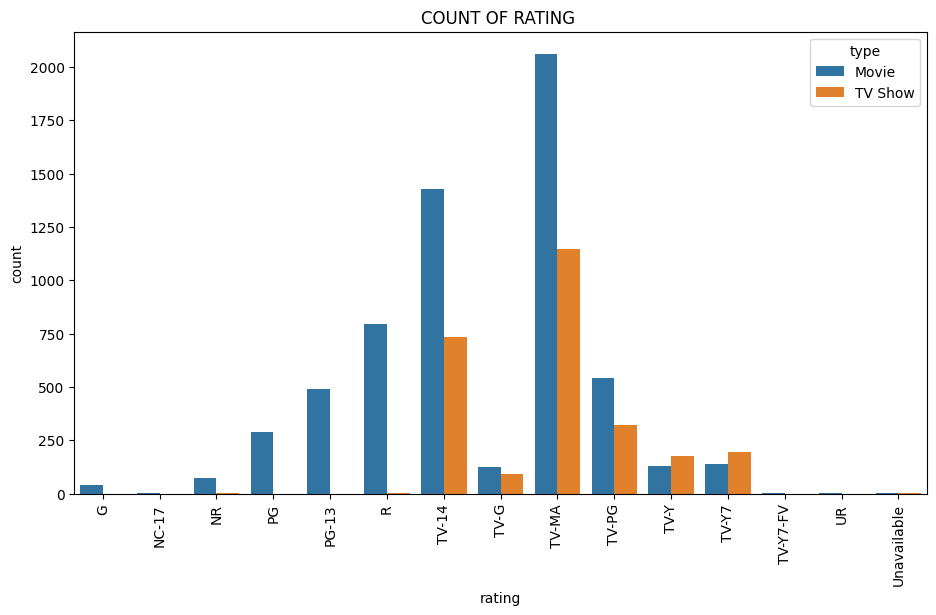

In [43]:
# countplot
plt.figure(figsize=(11,6))
sns.countplot(data=new_df,x = 'rating',hue = 'type')
plt.xticks(rotation = 90)
plt.title('COUNT OF RATING ')
plt.show()

In [44]:
new = new_df.groupby('release_year')['type'].value_counts().unstack(level=-1)
new

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,1
...,...,...
2017,767,265
2018,767,380
2019,633,397


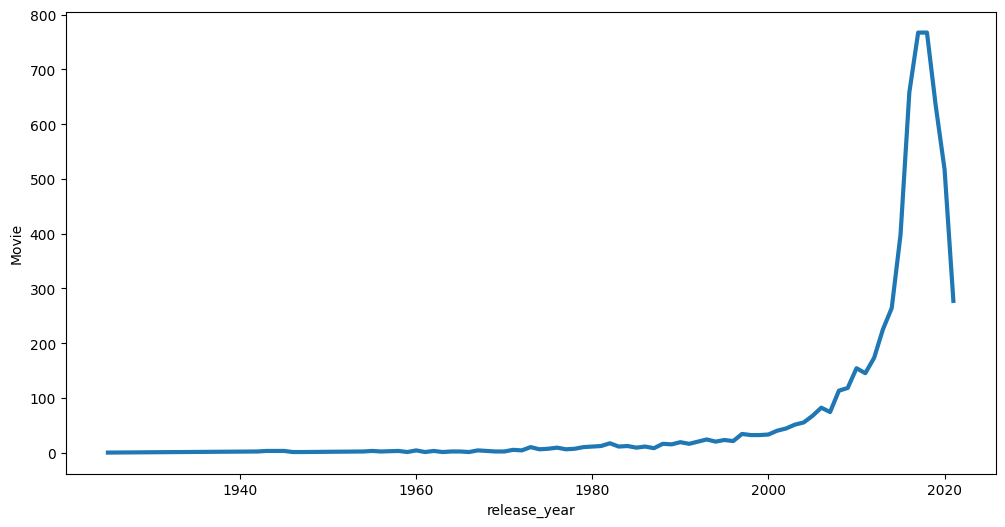

In [45]:
# lineplot
plt.figure(figsize = (12,6))
sns.lineplot(x='release_year', y='Movie', data=new,linewidth = 3)
plt.show()

CONCLUSION:

We can observe that from the year of 2000 to 2019 there is increase of content
and its peak value is in 2018 and 2019.
Probably due to the covid pandamic situation as there were lot of users traffic in the NETFLIX.
It shows a positive correlation.

**Analysis of actors/directors of different types of shows/movies.**

TOP ACTORS

In [46]:
#Identify the top 10 actor who have appeared in most movies or TV shows.
top10_cast = movies_df[movies_df['cast'] != 'Unknown']['cast'].str.split(',',expand = True).stack()
top10_cast.value_counts()[:10]

 Anupam Kher       38
 Rupa Bhimani      27
 Om Puri           27
Shah Rukh Khan     26
 Boman Irani       25
 Paresh Rawal      25
 Julie Tejwani     24
Akshay Kumar       23
 Rajesh Kava       21
 Kareena Kapoor    20
Name: count, dtype: int64

In [47]:
top10tv_cast =  tvshow_df[tvshow_df['cast'] != 'Unknown']['cast'].str.split(',',expand = True).stack()
top10tv_cast.value_counts()[:10]

 Takahiro Sakurai     24
 Yuki Kaji            17
 Junichi Suwabe       17
 Ai Kayano            17
 Daisuke Ono          14
David Attenborough    14
 Takehito Koyasu      13
 Yoshimasa Hosoya     13
 Yuichi Nakamura      13
 Tomokazu Sugita      12
Name: count, dtype: int64

TOP DIRECTORS

In [48]:
#Identify the top 10 directors who have appeared in most movies.
movie = movies_df[movies_df['director']!='Unknown']['director'].str.split(',',expand =True).stack().str.strip().value_counts()[:10]
movie

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: count, dtype: int64

In [49]:
#Identify the top 10 directors who have appeared in most tvshows.
tvshow = tvshow_df[tvshow_df['director']!='Unknown']['director'].str.split(',',expand =True).stack().str.strip().value_counts()
tvshow[:10]

Alastair Fothergill      3
Ken Burns                3
Jung-ah Im               2
Gautham Vasudev Menon    2
Iginio Straffi           2
Hsu Fu-chun              2
Stan Lathan              2
Joe Berlinger            2
Shin Won-ho              2
Lynn Novick              2
Name: count, dtype: int64

**WORDCLOUD**

MOST POPULAR GENRES

In [50]:
#Which genre of movies are more popular or produced more
topmovie_genre = movies_df['listed_in'].str.split(',').explode().str.strip().value_counts().reset_index()
topmovie_genre

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


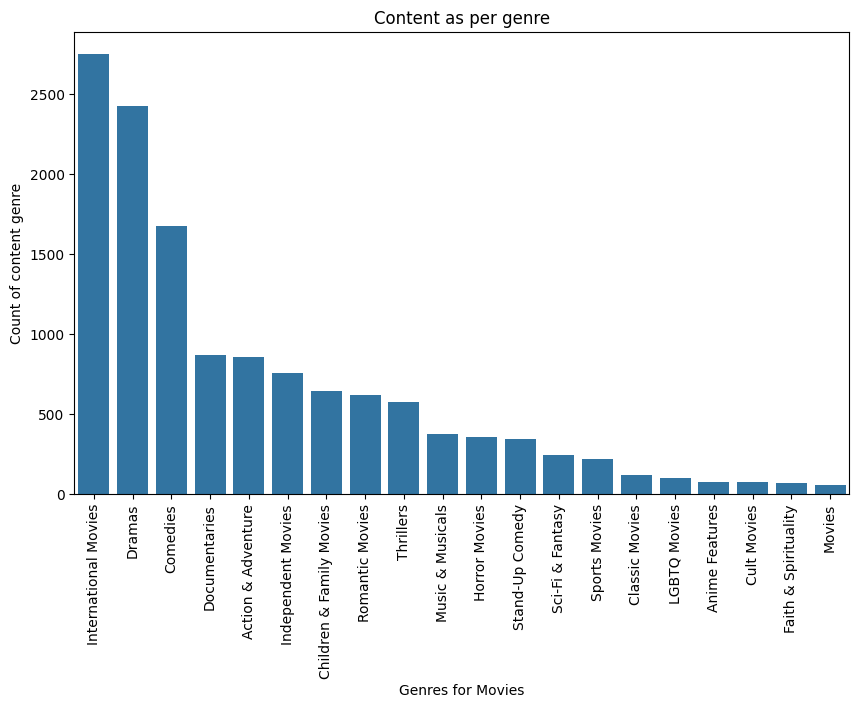

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(y = "count" , x="listed_in" , data = topmovie_genre )
plt.title("Content as per genre")
plt.xlabel("Genres for Movies")
plt.ylabel("Count of content genre")
plt.xticks(rotation = 90)
plt.show()

In [52]:
# Which genre of tv shows are more popular or produced more
topshows_genre = tvshow_df['listed_in'].str.split(',').explode().str.strip().value_counts().reset_index()
topshows_genre

,listed_in,count
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


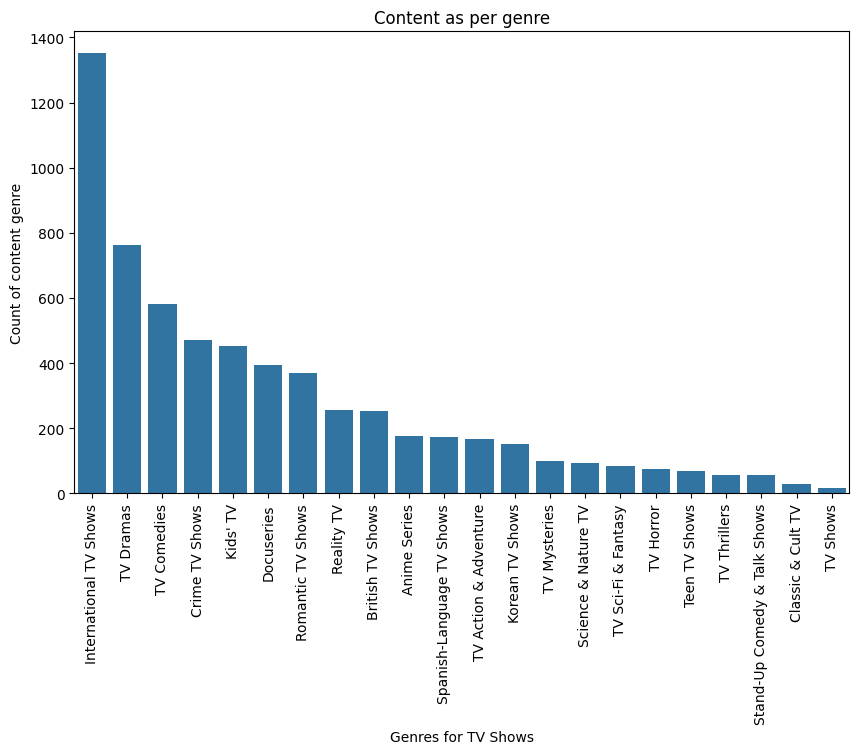

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(y = "count" , x="listed_in" , data = topshows_genre )
plt.title("Content as per genre")
plt.xlabel("Genres for TV Shows")
plt.ylabel("Count of content genre")
plt.xticks(rotation = 90)
plt.show()



> ## RANGE OF ATTRIBUTES:




*  Netflix dataset consists of 39249 of actors and 4527 of directors.
*  Netflix dataset consits of 69.69 %(approx 70 %) of Movies and
   30 % (approx) content from TV shows.
*  Netflix dataset consist data from the year 2008 to 2021.(Range of years).
*  Range for the data (movies and tv_shows)that releases year from 1925 to
   2021.
*   Range of the Rating that are availabe in Netflix are of 14 different
    kind in number. Name of all the unique ratings are in the following:
    
    ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']
*   Country where the movie/show was produced are 749 in number.



  




**Best month to release the content in movies and in tv shows**

In [54]:
# change the datatype of date added columns and add new columns like year, month_name,day_name for the movies dataframe
movies_df['date_added'] = pd.to_datetime(movies_df['date_added'])
movies_df['year_added'] = movies_df['date_added'].dt.year
movies_df['month_added'] = movies_df['date_added'].dt.month_name()
movies_df['week_added'] = movies_df['date_added'].dt.day_name()

In [55]:
#Find which is the best month to release the movie.
month_movies = movies_df['month_added'].value_counts().reset_index()
month_movies.rename(columns = {'index':'added_month','month_added':'movies_count'})

,movies_count,count
0,July,565
1,April,550
2,December,547
3,January,546
4,October,545
5,March,529
6,September,519
7,August,519
8,November,498
9,June,492


In [56]:
# change the datatype of date added columns and add new columns like year, month_name,day_name for the tvshow dataframe
# Strip leading and trailing spaces from dates
tvshow_df['date_added'] = tvshow_df['date_added'].str.strip()


tvshow_df['date_added'] = pd.to_datetime(tvshow_df['date_added'])
tvshow_df['year_added'] = tvshow_df['date_added'].dt.year
tvshow_df['month_added'] = tvshow_df['date_added'].dt.month_name()
tvshow_df['week_added'] = tvshow_df['date_added'].dt.day_name()

In [57]:
#Find which is the best month to release the Tv shows.
month_tvshow = tvshow_df['month_added'].value_counts().reset_index()
month_tvshow.rename(columns = {'index':'added_month','month_added':'tvshow_count'})

,tvshow_count,count
0,December,266
1,July,262
2,September,251
3,August,236
4,June,236
5,October,215
6,April,214
7,March,213
8,November,207
9,May,193


CONCLUSION:

*   Best month to release the content in the platform is JULY and APRIL for MOVIES.
*   Besst month to release the content in the platform is DECEMBER and JULY for
TV SHOWS.



**Best week to release the movies and tv shows**

In [58]:
#Find which is the best week to release the movie.
week_movies = movies_df['week_added'].value_counts().reset_index()
week_movies = week_movies.rename(columns = {'index':'weekname','week_added':'added_counts'})
week_movies

,added_counts,count
0,Friday,1566
1,Thursday,1053
2,Wednesday,906
3,Tuesday,852
4,Monday,628
5,Sunday,569
6,Saturday,557


In [59]:
#Find which is the best week to release the Tv show.
week_tvshow = tvshow_df['week_added'].value_counts().reset_index()
week_tvshow = week_tvshow.rename(columns = {'index':'weekname','week_added':'tvshow_counts'})
week_tvshow

,tvshow_counts,count
0,Friday,932
1,Wednesday,382
2,Tuesday,345
3,Thursday,343
4,Saturday,259
5,Monday,223
6,Sunday,182


CONCLUSION:

From the above we can observe that in both movies and tv shows best week to release the content in NETFLIX is FRIDAY(as FRIDAY week consists of the highest number of releases in movies as well as in tv shows)

# **HEATMAPS AND PAIR PLOT**

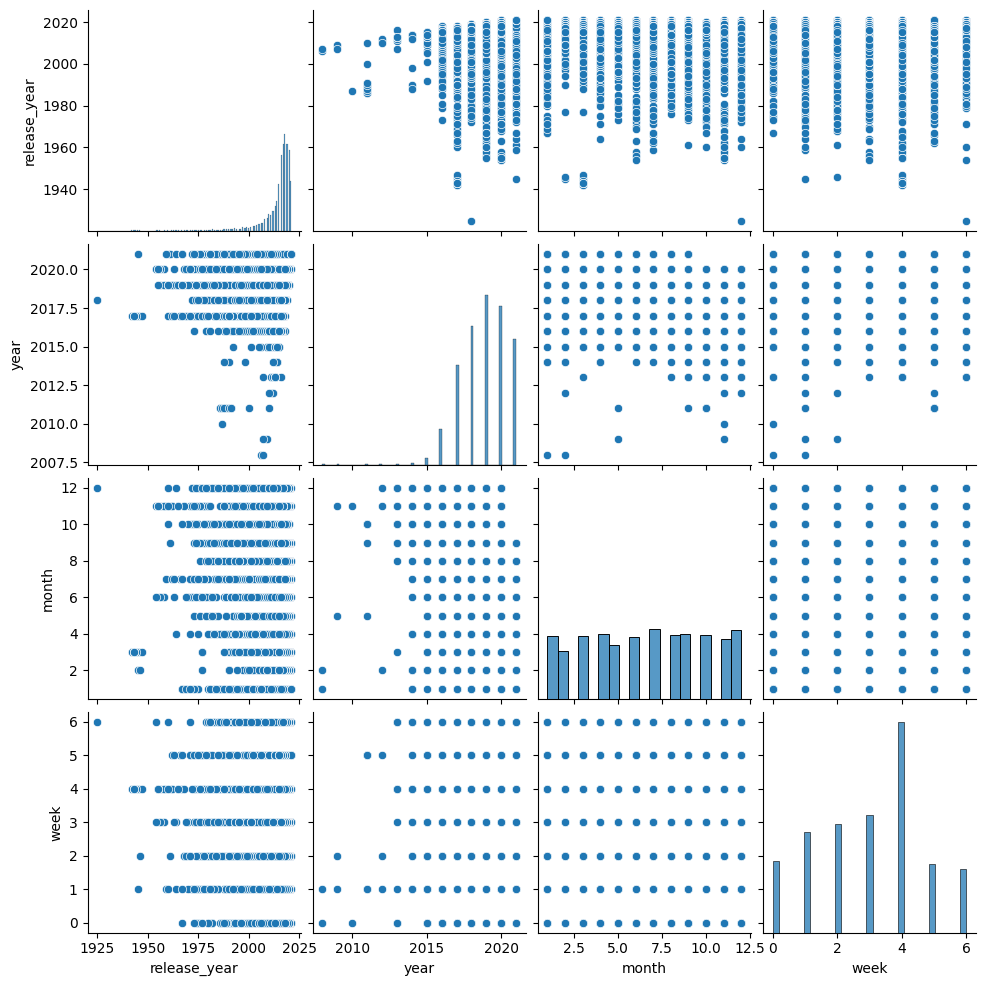

In [60]:
sns.pairplot(data =new_df)
plt.show()

CONCLUSION:

From this pairplot we observe that none of the data variables are neither positively correlated nor negatively correlated .

HEATMAP

**HEATMAP:**

Q=> FOR THE OBSERVATION OF HIGHEST CONTENT ADDED IN NETFLIX IN WHICH YEAR AND MONTH

In [61]:
# add new column in data frame that is months name
new_df['months']=new_df['date_added'].dt.month_name()

In [62]:
# filter out the data for last 10 years
filter_data = new_df[new_df['release_year'] > 2011]
filter_data[:2]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,week,months
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,9.0,5.0,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0,9.0,4.0,September


In [63]:
heat_val = filter_data.groupby('release_year')['months'].value_counts().unstack().fillna(0).T
heat_val

release_year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
months,,,,,,,,,,
April,21.0,29.0,34.0,51.0,86.0,89.0,85.0,95.0,85.0,59.0
August,21.0,24.0,29.0,47.0,74.0,70.0,90.0,83.0,81.0,76.0
December,27.0,25.0,32.0,59.0,103.0,106.0,122.0,86.0,93.0,1.0
February,13.0,22.0,27.0,47.0,68.0,81.0,92.0,57.0,57.0,45.0
January,17.0,24.0,24.0,28.0,64.0,104.0,83.0,49.0,67.0,44.0
July,34.0,39.0,35.0,56.0,57.0,78.0,95.0,104.0,88.0,94.0
June,17.0,13.0,29.0,44.0,65.0,84.0,89.0,105.0,82.0,86.0
March,16.0,25.0,33.0,48.0,94.0,81.0,99.0,78.0,82.0,58.0
May,16.0,13.0,19.0,36.0,59.0,76.0,99.0,88.0,76.0,59.0


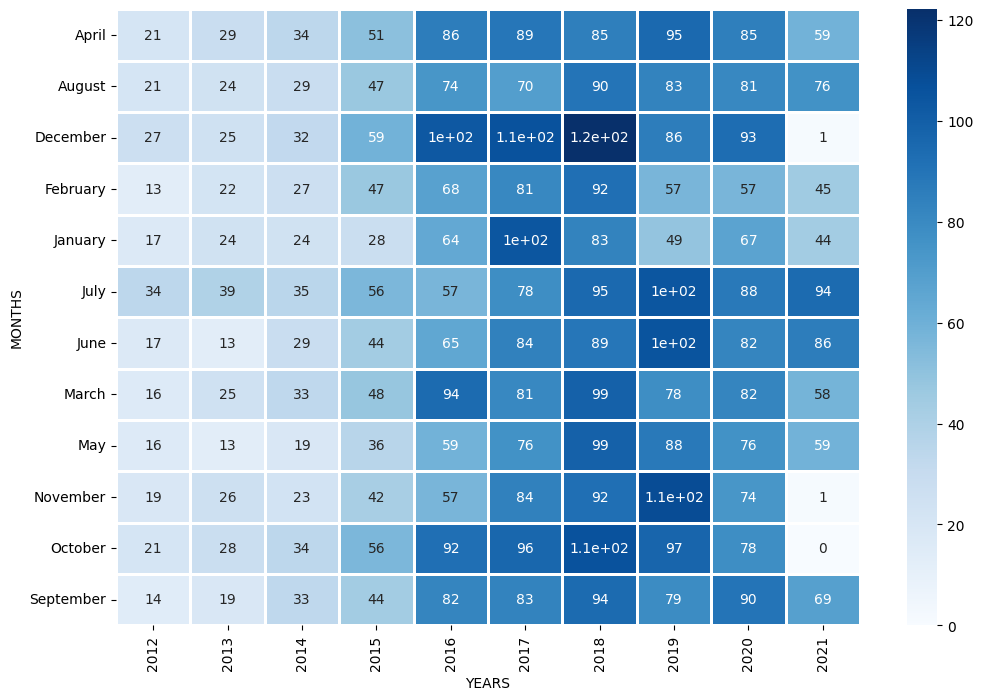

In [79]:
# plot the heatmap for the above data frame
plt.figure(figsize= (12,8))
sns.heatmap(heat_val,cmap='Blues',linewidths=2,annot = True)
plt.xlabel('YEARS')
plt.xticks(rotation = 90)
plt.ylabel('MONTHS')
plt.show()

CONCLUSION:

We can observe that from year 2015 to 2021 there is a increase of content added in the netflix platform . And in year 2018 incomparison to other year most amount of content added in the platform (main reason might be becasuse of the COVID-19 pandamic).
In 2018 DECEMBER months the content ratio is way more in comparion to others

In [65]:
# sns.heatmap(new_df.corr(),annot = True,cmap = 'Blues')
# plt.show()

# OUTLIER CHECK
By ploting the boxplot we can clearly see the outliers present in the duration column for movies and seasons in tvshows.


In [66]:
movies_df['duration'] = movies_df['duration'].str.split(' ',expand = True)[0]

In [67]:
tvshow_df.rename(columns = {'duration':'seasons'},inplace = True)

In [68]:
tvshow_df['seasons'] = tvshow_df['seasons'].str.split(' ',expand = True)[0]

In [69]:
#convert tvshow seasons into integer type and movies durations into integer
tvshow_df['seasons'] = tvshow_df['seasons'].astype('int')
movies_df['duration'] = movies_df['duration'].astype('int')

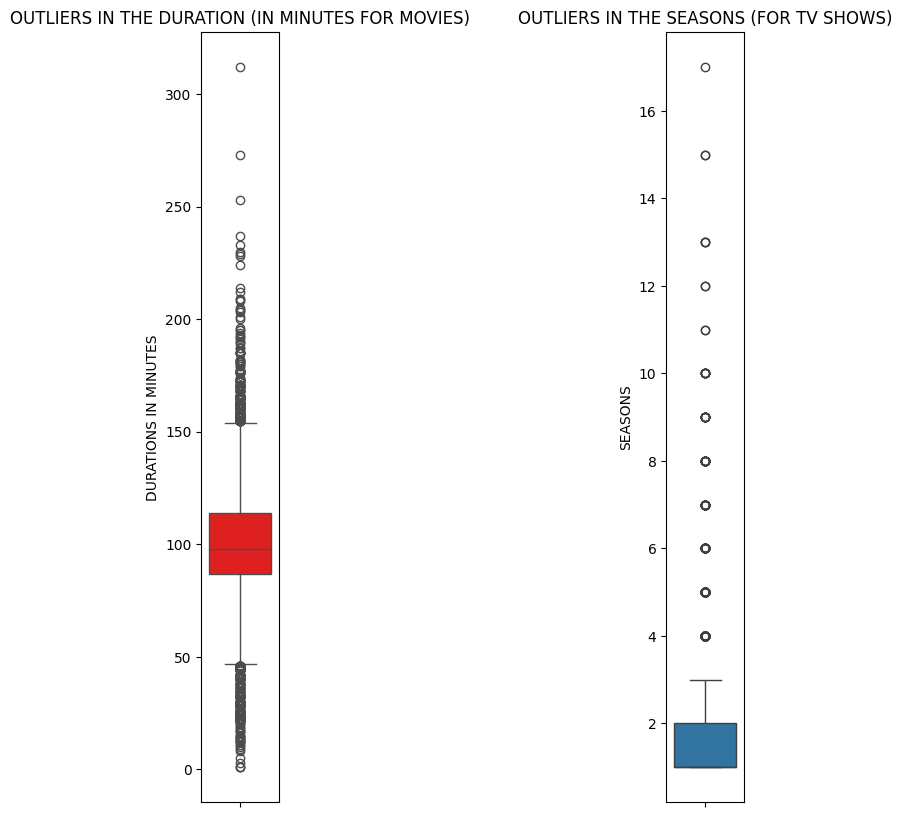

In [70]:
# BOXPLOT
plt.figure(figsize = (7,10))
plt.subplot(1,6,1)
sns.boxplot(data = movies_df, y= 'duration',color ='red')
plt.title('OUTLIERS IN THE DURATION (IN MINUTES FOR MOVIES)')
plt.ylabel('DURATIONS IN MINUTES')

plt.subplot(1,6,6)
sns.boxplot(data = tvshow_df , y = 'seasons')
plt.title('OUTLIERS IN THE SEASONS (FOR TV SHOWS)',)
plt.ylabel('SEASONS')

plt.show()

CONCLUSION:

Analysing the movie box plot:

We can observe that mostof the movies fall within a reasonable duration
range that is in INTER QUARTILE RANGE,But few outliers exceeds approximately 2.5 hours(150 running time or duration in minutes).

From this we conclue that most of movies on Netflix are designed to fit within a standard viewing time.

Analysing the box plot For TV shows:

The box plot implies that most of the tv shows have one to two seasons, it lies in the IQR And having very few seasons which are very large in number.

From this we can conlude that outliers are mainly from the content which are running for vary large time, and now netflix need to focous more on the tv shows with less seasons or in that season which have very less episoe, or we can say that Netflix need to focuses on shorter series formats in tv shows type.

# BUSINESS INSIGHTS:

1. QUANTITY:From the above analysis we observe that NETFLIX has added more movies than TV shows.70% is availabe is Movies and remaining 30% are the TV Shows.
  So to Balance out this proportion we need to add more content in TV shows to attract a wider audiance to our platform.

2. CONTENT ADDED: *In JULLY month, NETFLIX added the most content closely followed by December it indicate a strategic approach to release the content.*

3. POPULAR GENRES:  It is observed that in various genres, such as International Movies,Dramas,Comedies for movies content and International TV Shows,TV Dramas,TV Comedies, Crime TV Shows for the Tv shows are the most loved or popular content in netflix.

4. MOVIES DURATIONS: The analysis of movie durations indicated a peak around the 1960s.

5. TV Show SEASONS: Most TV shows on Netflix have one season, suggesting a
preference for shorter series among viewers.

6. RATING: Most of the content availabe in NETFLIX are for Mature Audiance only
The distribution of ratings over the years offers insights into the
evolving content landscape and audience reception.




# RECOMMENDATIONS:

*   As we know that approx 70% of data availabe in Netflix are Movies
and 30 % remaing are the TV shows. So we need to focus more on TV shows type of content to increase the reach of the TV shows audiance .Side by side work
on the stronger content also i.e. Movies so that the audience availabe for the
Movies not left over with nothing new content.

*   Try to add more content for younger/children/family audience ,as we can see from this data that most of the content rating are of TV-MA(Mature Audiance only or require parental guidance) .So, to increase the reach of the target audience we need to add more content which are for younger generation and family friendly content.

*   We need to grow our market in other countries also which are not present in the dataset. like china , Brazil,Russia, etc

*   We need to focus on our key market customer of the countries like United States, India, Uk, Canada, Spain etc from where most of the customer are present.Understand the customer preferences and sort the content library accordingly.

*  To increase the customer reach we also tie up to other big/local firms
so that we can provide the data in multiple languages or users native languages
to increase the reach more to the users.
Also join with the firms that helps us in dubbing the movies and tv-shows into multiple languages.

* Leverage user data and machine learning algorithms to provide personalized recommendations to subscribers.This can enhance user experience and suggests only those content that aligns with individual tastes and preferences.

*   Add more content like Old Movies for the people who like to watch the older content and content like Anime for the young blood.

*  From dataset we observe that number of international movies genre are more so need to give priority to other geners like hooro,comedy..etc

*  In TV Shows we may focus on thriller genre which will be helpfull for having more number of seasons.

* Most of the movies released in NETFLIX is in a year of 2019. So, we need to go-on increasing this value in order to attract people by showing that :-
 "Getting subscription is usefull as netflix is releasing more movies per year"



